In [1]:
import torch
import torchvision as tv

Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

- попробуйте заменить SGD на Adam и RMSProp. Увеличится ли скорость сходимости?
- попробуйте сделать больше слоев в сети - увеличится ли качество?
- попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [2]:
import torchvision
import time
import matplotlib.pyplot as plt

In [0]:
#def transform(data):
#    data = torch.tensor(data.getdata(), dtype=torch.float32)
#    return torch.floor(data / 128.).squeeze(axis=-1)

In [3]:
#Fmnist_train = tv.datasets.FashionMNIST('.', train=True, transform=transform, download=True)
#Fmnist_test  = tv.datasets.FashionMNIST('.', train=False, transform=transform, download=True)

Fmnist_train = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
Fmnist_test  = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw


Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw
Processing...


C:\Users\zamarseny\anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
labels_f={0:	'T-shirt/top',
1:	'Trouser',
2:	'Pullover',
3:	'Dress',
4:	'Coat',
5:	'Sandal',
6:	'Shirt',
7:	'Sneaker',
8:	'Bag',
9	:'Ankle boot'}

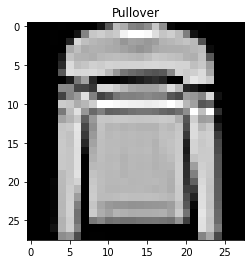

In [6]:
#Fmnist_train[0][0].reshape(28,28)#.shape
i=5
plt.title(labels_f[Fmnist_train[i][1]])
plt.imshow(Fmnist_train[i][0].numpy().reshape((28,28)), cmap='gray')

In [7]:
#Option III: Five fc layers 0.85 test accuracy
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    
    #torch.nn.Dropout(0.1),
    torch.nn.BatchNorm1d(num_features=784),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=512),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    
    torch.nn.BatchNorm1d(num_features=256),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 150),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=150),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(150, 80),
    torch.nn.ReLU(),

    torch.nn.BatchNorm1d(num_features=80),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(80, 10)
)

loss = torch.nn.CrossEntropyLoss(reduction='sum')
#trainer = torch.optim.Adam(model.parameters(), lr=0.001)
trainer = torch.optim.Adam(model.parameters())

In [9]:
train, test = torch.utils.data.DataLoader(Fmnist_train, 256, shuffle=True), torch.utils.data.DataLoader(Fmnist_test, 256)

In [10]:
num_epochs = 15
for epoch in range(0, num_epochs):
    start, train_loss, train_acc, train_n, test_loss, test_acc, test_n = time.time(), 0., 0., 0, 0., 0., 0
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_hat = model.forward(X)
        l = loss(y_hat, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_hat.argmax(dim=1) == y).sum().item()
        train_n += len(X)
    
    model.eval()
    for X, y in test:
        y_hat = model.forward(X)
        l = loss(y_hat, y)
        test_loss += l.item()
        test_acc += (y_hat.argmax(dim=1) == y).sum().item()
        test_n += len(X)   
        
    print("""epoch {}, taked: {:.3f}
train -> loss: {:.3f}, acc: {:.3f}
test -> loss: {:.3f}, acc: {:.3f}
""".format(epoch, time.time() - start, train_loss / train_n, train_acc / train_n,
       test_loss / test_n, test_acc / test_n))


epoch 0, taked: 13.777
train -> loss: 0.592, acc: 0.799
test -> loss: 0.418, acc: 0.850

epoch 1, taked: 12.568
train -> loss: 0.416, acc: 0.851
test -> loss: 0.377, acc: 0.862

epoch 2, taked: 12.401
train -> loss: 0.381, acc: 0.862
test -> loss: 0.355, acc: 0.872

epoch 3, taked: 12.206
train -> loss: 0.359, acc: 0.869
test -> loss: 0.350, acc: 0.874

epoch 4, taked: 12.439
train -> loss: 0.339, acc: 0.877
test -> loss: 0.348, acc: 0.873

epoch 5, taked: 12.438
train -> loss: 0.330, acc: 0.880
test -> loss: 0.331, acc: 0.882

epoch 6, taked: 12.359
train -> loss: 0.320, acc: 0.882
test -> loss: 0.336, acc: 0.879

epoch 7, taked: 12.701
train -> loss: 0.307, acc: 0.888
test -> loss: 0.325, acc: 0.883

epoch 8, taked: 12.364
train -> loss: 0.299, acc: 0.890
test -> loss: 0.323, acc: 0.885

epoch 9, taked: 13.190
train -> loss: 0.294, acc: 0.893
test -> loss: 0.314, acc: 0.885

epoch 10, taked: 12.527
train -> loss: 0.286, acc: 0.895
test -> loss: 0.316, acc: 0.888

epoch 11, taked: 13.

In [12]:
#y_pred=torch.Tensor([1], dtypes=torch.int64)
y_pred=torch.zeros((1), dtype=torch.int64)
y_true=torch.zeros((1), dtype=torch.int64)
model.eval()
for X, y in test:
  #pass
  y_hat = model.forward(X)
  #print(y_pred.shape, torch.argmax(y_hat, dim=1).shape)
  pred_int=torch.argmax(y_hat, dim=1)
  y_pred=torch.cat((y_pred, pred_int), axis=0)
  y_true=torch.cat((y_true, y), axis=0)
y_pred=y_pred[1:]
y_true=y_true[1:]
len(y_pred), y_pred
#for i in test:
#  print(i[1])

(10000, tensor([9, 2, 1,  ..., 8, 1, 5]))

In [14]:
list(labels_f.values())

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred  , target_names=list(labels_f.values())))
print(confusion_matrix(y_true, y_pred,))#, labels=list(labels_f.values())))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.78      0.81      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.71      0.68      0.70      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[888   1   6  20   3   0  76   0   6   0]
 [  2 968   4  18   3   0   4   0   1   0]
 [ 16   1 776  15  89   0 101   0   2   0]
 [ 25   6   4 922  19   0  20   0   4   0]
 [  0   0  62  43 821   0  74   0   0   0]
 [  0   0   0   0   0 955 

In [0]:
# "T-shirt/top" путается "Shirt"
#конец решения